In [210]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import calendar
from ipyleaflet import Map, Marker
import folium

In [213]:
class ExploratoryDataAnalysis():
    def __init__(self,f_name):
        self.f_name = pd.read_csv(f_name,parse_dates=["Incident Date"],index_col="Incident Date")
        self.max_month = None
        self.max_kills = None
        self.max_month_num=None
        
    def print_data(self,n=5):
        print(self.f_name[:n])
    
    def cal_kills(self):
        kills = self.f_name['# Killed'].values
        injured = self.f_name['# Injured'].values
        tot = kills+injured
        self.f_name['total_kills'] = tot
    
    def plot_kills(self):
        data_frame  = self.f_name['total_kills']
        ax = data_frame.plot(figsize=(10,5))
        # Set the x-axis label
        ax.set_xlabel("Time")

        # Set the y-axis label
        ax.set_ylabel("Kills")
        ax.set_title("Kill Counts")
    
    def plot_data(self,label,counts):
        print(self.max_month+" has maxinuim number of kill of "+str(self.max_kills))
        plt.bar(label,counts)
        plt.xlabel("Months")
        plt.ylabel("Kill Counts")
        plt.title("Kill Analysis")
        plt.show()
        
    def max_kill_month(self):
        month_dic = {}
        dates = self.f_name.index.month.values
        total_kils = self.f_name['total_kills'].values
        for x in dates:
            month_dic[x]=0
        for mnt,kill in zip(dates,total_kils):
            month_dic[mnt]+=kill
            
        max_kill_month=0
        month_name = None
        month_num = None
        label = []
        counts = []
        for month,kills in month_dic.items():
            if(max_kill_month<kills):
                max_kill_month = kills
                month_name = calendar.month_name[month]
                month_num = month
            label.append(calendar.month_name[month])
            counts.append(kills)
        self.max_month = month_name
        self.max_kills = max_kill_month
        self.max_month_num = month_num
        
        self.plot_data(label,counts)
    

In [215]:
if __name__ == "__main__":
    eda = ExploratoryDataAnalysis("GunviolenceSA.csv")
    eda.cal_kills()

May has maxinuim number of kill of 30


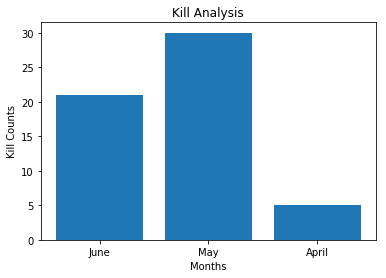

In [216]:
eda.max_kill_month()

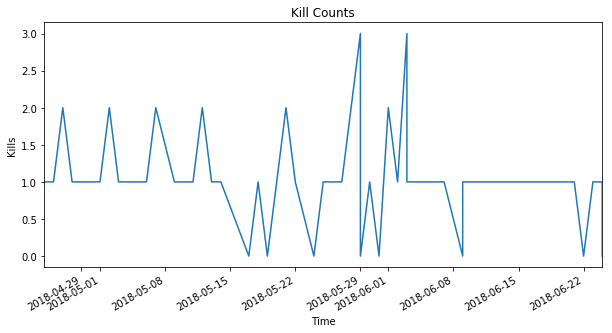

In [217]:
eda.plot_kills()